In [ ]:
import urllib, json
import pandas as pd
import seaborn as sns
from plotnine import *
from google.colab import drive
from google.colab import files
import io
!pip install gender-guesser
import gender_guesser.detector as gen

In [ ]:
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [ ]:
df.head()

,id,year,imdbid,rating,title
0,9602,1874,3155794,0,Passage de Venus
1,9804,1877,14495706,0,La Rosace Magique
2,9603,1878,2221420,0,Sallie Gardner at a Gallop
3,9806,1878,12592084,0,Le singe musicien
4,9816,1881,7816420,0,Athlete Swinging a Pick


In [ ]:
dfNew_movies = df[df['year']>= 1970]

In [ ]:
dfNew_movies.head()

,id,year,imdbid,rating,title
1337,255,1970,0065531,0,Le Cercle Rouge
1338,583,1970,0065466,3,Beyond the Valley of the Dolls
1339,1122,1970,0065421,3,"AristoCats, The"
1340,1726,1970,0066327,1,Santa Clause is Comin&#39; to Town
1341,1932,1970,0064806,1,"Phantom Tollbooth, The"


In [ ]:
dfNew_movies.count()

id        8050
year      8050
imdbid    8050
rating    8050
title     8050
dtype: int64

In [ ]:
dfNew_movies.rename(columns={'rating':'Bechdel Score'}, inplace = True)
dfNew_movies['year'] = pd.to_datetime(dfNew_movies['year'], format='%Y')
dfNew_movies['Bechdel Score'] = dfNew_movies['Bechdel Score'].astype('category',copy=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

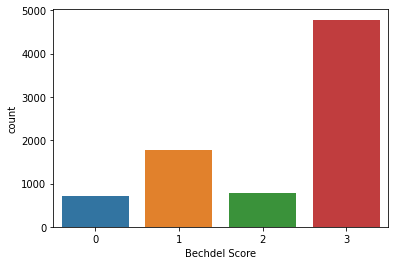

In [ ]:
sns.countplot(x='Bechdel Score', data=dfNew_movies)

In [ ]:
li = []
for i in dfNew_movies['Bechdel Score']:
  if(i<3):
    li.append(0)
  else:
    li.append(1)

dfNew_movies['test_passed'] = li
dfNew_movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,year,imdbid,Bechdel Score,title,test_passed
1337,255,1970-01-01,0065531,0,Le Cercle Rouge,0
1338,583,1970-01-01,0065466,3,Beyond the Valley of the Dolls,1
1339,1122,1970-01-01,0065421,3,"AristoCats, The",1
1340,1726,1970-01-01,0066327,1,Santa Clause is Comin&#39; to Town,0
1341,1932,1970-01-01,0064806,1,"Phantom Tollbooth, The",0


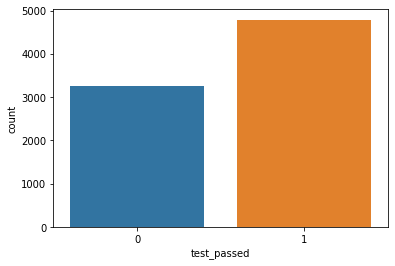

In [ ]:
sns.countplot(x='test_passed', data=dfNew_movies)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


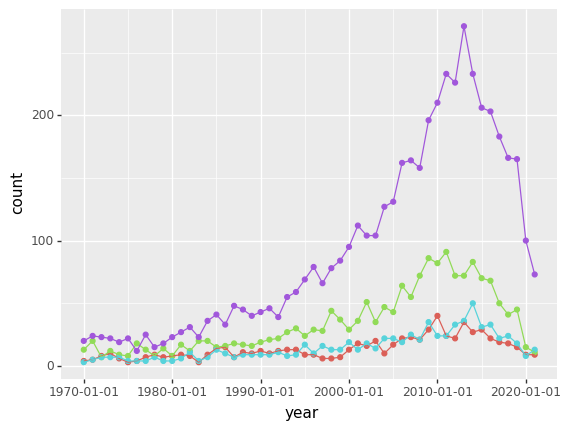

<ggplot: (8786092484429)>

In [ ]:
(ggplot(dfNew_movies) + geom_point(aes('year', color = dfNew_movies['Bechdel Score']), stat = 'count', show_legend = False) + geom_line(aes('year', color=dfNew_movies['Bechdel Score']), stat = 'count', show_legend = False))

In [ ]:
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
imdb = pd.read_csv(io.BytesIO(uploaded['movies.csv']))

In [ ]:
imdb_title_rating = imdb[['title','rating']]

In [ ]:
dfNew_movies_merged_imdb = pd.merge(dfNew_movies, imdb_title_rating, how='left', left_on=['title'],right_on=['title'])

In [ ]:
dfNew_movies_merged_imdb.head()

,id,year,imdbid,Bechdel Score,title,test_passed,rating
0,255,1970-01-01,0065531,0,Le Cercle Rouge,0,NaN
1,583,1970-01-01,0065466,3,Beyond the Valley of the Dolls,1,5.4
2,1122,1970-01-01,0065421,3,"AristoCats, The",1,NaN
3,1726,1970-01-01,0066327,1,Santa Clause is Comin&#39; to Town,0,NaN
4,1932,1970-01-01,0064806,1,"Phantom Tollbooth, The",0,6.3


In [ ]:
dfNew_movies_merged_imdb.dropna()
dfNew_movies_merged_imdb = dfNew_movies_merged_imdb.drop('id',axis=1)

df_year_bechdel_score = dfNew_movies_merged_imdb.groupby(['year', 'Bechdel Score']).agg({'rating':'mean'}).reset_index()

df_year_bechdel_score.head()

,year,Bechdel Score,rating
0,1970-01-01,0,7.150000
1,1970-01-01,1,7.054545
2,1970-01-01,2,6.866667
3,1970-01-01,3,6.440000
4,1971-01-01,0,6.875000


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


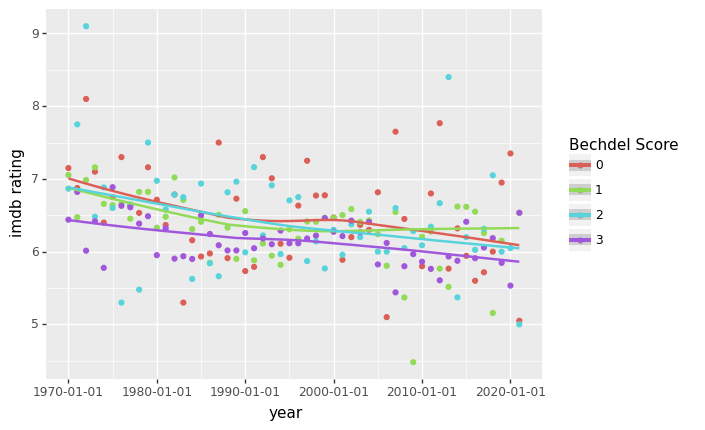

<ggplot: (8786090838713)>

In [ ]:
ggplot( df_year_bechdel_score , aes(x = 'year', y='rating', color = 'Bechdel Score')) + geom_point()  + geom_smooth() + scale_y_continuous(name="imdb rating") + labs( color = 'Bechdel Score')

In [61]:
uploaded = files.upload()

Saving movielatest.csv to movielatest.csv


In [77]:
dflatest = pd.read_csv(io.BytesIO(uploaded['movielatest.csv']),encoding="latin")
dfMovie_latest.head()
dfMovie_latest = dflatest[['name', 'director']]
dfMovie_latest.head()
dfMovie_latest.rename(columns={'name':'title'}, inplace =True)
dfMovie_latest_merged_imdb = pd.merge(dfNew_movies_merged_imdb, dfMovie_latest, how='left', left_on=['title'], right_on=['title'])

dfMovie_latest_merged_imdb = dfMovie_latest_merged_imdb.dropna()

dfMovie_latest_merged_imdb.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,imdbid,Bechdel Score,title,test_passed,rating,director
55,1971-01-01,0067800,1,Straw Dogs,0,7.4,Rod Lurie
56,1971-01-01,0067741,1,Shaft,0,6.5,John Singleton
57,1971-01-01,0067741,1,Shaft,0,6.0,John Singleton
83,1971-01-01,0067128,1,Get Carter,0,7.4,Stephen Kay
84,1971-01-01,0067128,1,Get Carter,0,4.7,Stephen Kay


In [78]:
#predict the gender of the director by using the First Name

gender_predictor = gen.Detector()
genders = []

firstNames = dfMovie_latest_merged_imdb['director'].str.split().str.get(0)

for i in firstNames[0:len(firstNames)]:
  if gender_predictor.get_gender(i) == 'male':
    genders.append('male')
  elif gender_predictor.get_gender(i) == 'female':
    genders.append('female')
  else:
    genders.append('undefined')

dfMovie_latest_merged_imdb['gender'] = genders
dfMovie_latest_merged_imdb = dfMovie_latest_merged_imdb[dfMovie_latest_merged_imdb['gender'] != 'undefined']

dfMovie_latest_merged_imdb['male'] = dfMovie_latest_merged_imdb['gender'].map( {'male':1,'female':0} )

dfMovie_latest_merged_imdb.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,imdbid,Bechdel Score,title,test_passed,rating,director,gender,male
55,1971-01-01,0067800,1,Straw Dogs,0,7.4,Rod Lurie,male,1
56,1971-01-01,0067741,1,Shaft,0,6.5,John Singleton,male,1
57,1971-01-01,0067741,1,Shaft,0,6.0,John Singleton,male,1
83,1971-01-01,0067128,1,Get Carter,0,7.4,Stephen Kay,male,1
84,1971-01-01,0067128,1,Get Carter,0,4.7,Stephen Kay,male,1


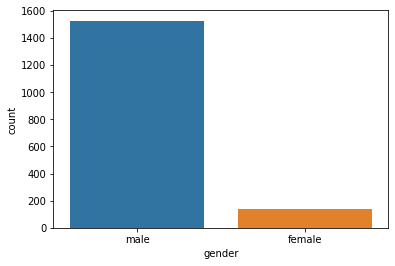

In [79]:
sns.countplot(x='gender',data=dfMovie_latest_merged_imdb)

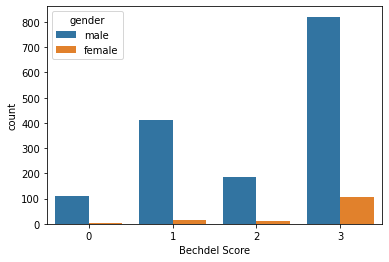

In [80]:
sns.countplot(x='Bechdel Score', hue='gender', data=dfMovie_latest_merged_imdb)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


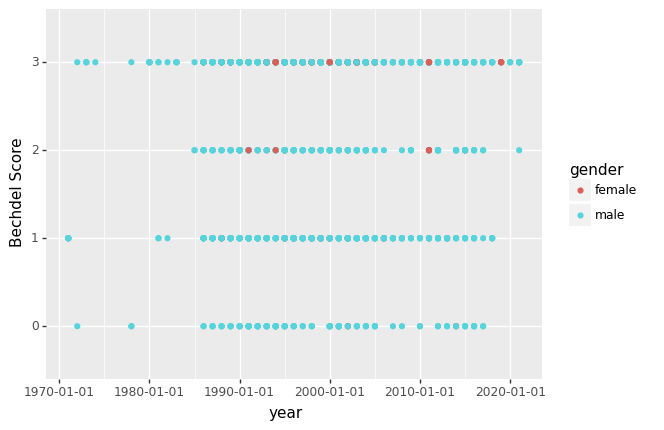

<ggplot: (8786086973225)>

In [81]:
ggplot(aes( x= 'year', y= 'Bechdel Score', color = 'gender'), data = dfMovie_latest_merged_imdb) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 122 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


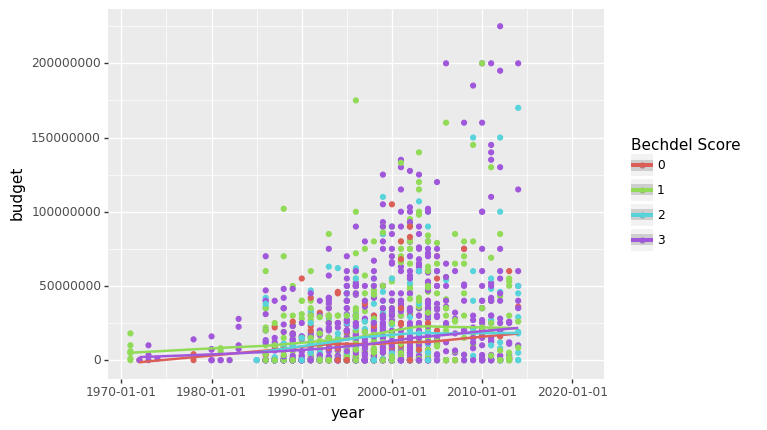

<ggplot: (8786081141881)>

In [82]:
dfMovie_latest_merged_imdb['budget'] = dflatest['budget']

ggplot(aes( x='year', y='budget', color='Bechdel Score'), data = dfMovie_latest_merged_imdb) + geom_point() + geom_smooth()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 122 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


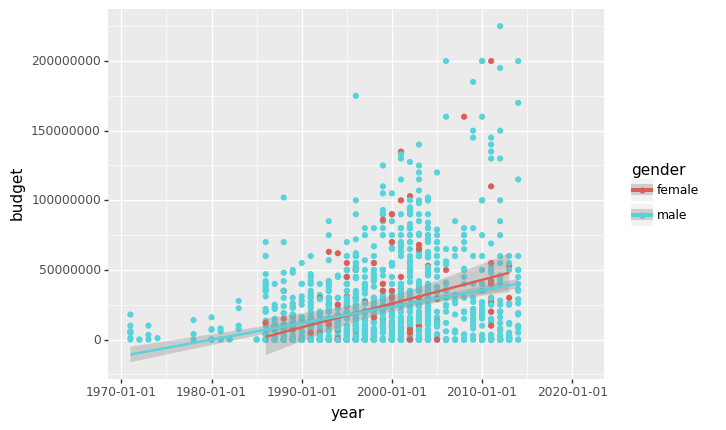

<ggplot: (8786081141929)>

In [83]:
ggplot(aes( x='year', y='budget', color='gender'), data = dfMovie_latest_merged_imdb) + geom_point() + geom_smooth()

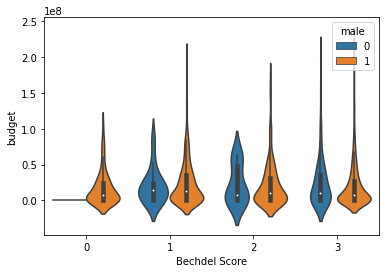

In [86]:
sns.violinplot(x='Bechdel Score', y='budget', hue='male', data=dfMovie_latest_merged_imdb)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


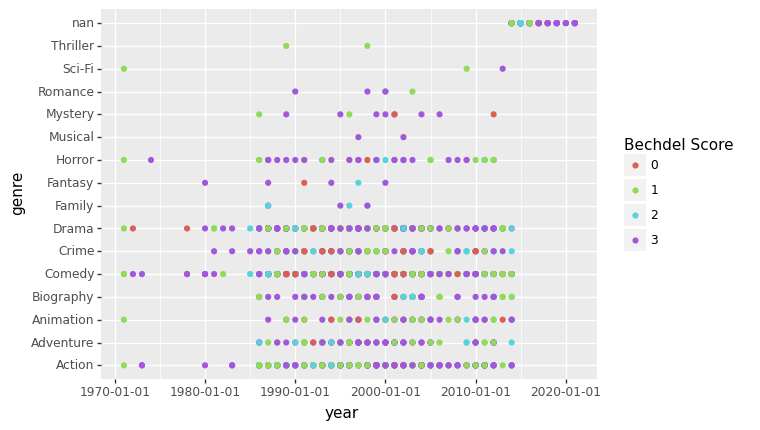

<ggplot: (8786086824121)>

In [89]:
dfMovie_latest_merged_imdb['genre'] = dflatest['genre']

ggplot(aes(x='year',y='genre',color='Bechdel Score'), data = dfMovie_latest_merged_imdb) + geom_point()

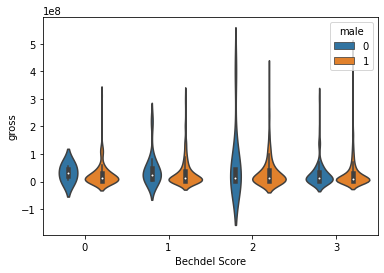

In [90]:
dfMovie_latest_merged_imdb['gross'] = dflatest['gross']

sns.violinplot(x='Bechdel Score', y='gross', hue='male', data=dfMovie_latest_merged_imdb)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 122 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


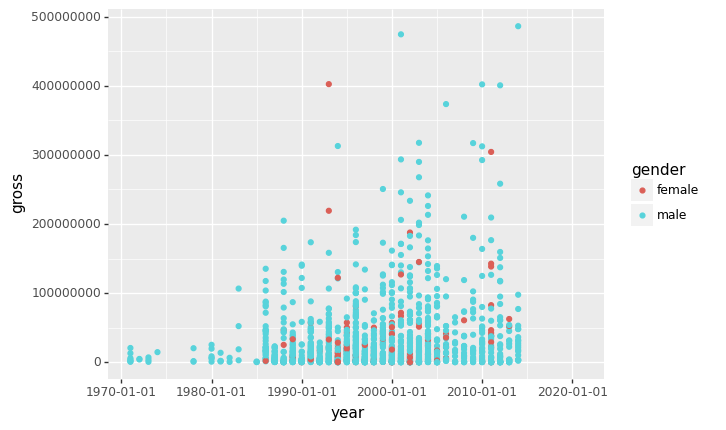

<ggplot: (8786086450225)>

In [91]:
ggplot(aes(x='year', y='gross', color='gender'), data = dfMovie_latest_merged_imdb) + geom_point()

To summarize the findings of the analysis we can say the following:

1. the gender of the dircetor of the Movie might have a significant higher Bechdel Score

2. the gross of a movie is not signifiacntly lower if the director is a female of has a high Bechdel Score

3. the genre is completely independent of the Bechdel Score 

4. Movies the passed the Bechdel test have almost all the time a worse IMDB rating then the ones that have not passed the test

5. the Budget is not a significant factor for the out come of the Bechdel test, but it seem that we see an increase in the Bugedt for Movies with a femal director on the lon term. But this has not to be a correlation becuase in new movies the genral budget has an increase and also female actors a quite rare and tend also to only take part in newer movies

